In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import AP1 as ap
pd.options.display.precision = 0

In [21]:
u_c = np.array( [ 8, 7, 5.9, 5, 4.4, 4, 3.1, 3, 2.2, 2, 1.5, 1, 0.6, 0.3, 0.1]) * 5
t_c = np.array( [ 0, 0.4, 1, 1.6, 2, 2.3, 3, 3.1, 4, 4.3, 5, 6, 7, 8, 8.8]) * 2 *10**(-6)

u_r = np.array( [ 8, 7, 6.2, 6.0, 5, 4.8, 4, 3.7, 3, 2.4, 2, 1.8, 1.5, 1.3, 1.0, 0.8]) *5
t_r = np.array( [ 0, 0.6, 1, 1.2, 1.8, 2, 2.8, 3, 4, 5, 5.7, 6, 7, 8, 9, 10]) *2 * 10**(-6)

du_c = np.sqrt((u_c * 0.03)**2 + (0.5)**2)
du_r = np.sqrt((u_r * 0.03)**2 + (0.5)**2)

dt_c = np.sqrt((t_c * 0.03)**2 + (0.2*10**(-6))**2)
dt_r = np.sqrt((t_r * 0.03)**2 + (0.2*10**(-6))**2)


data = pd.DataFrame(data=[u_c, du_c, t_c, dt_c, u_r, du_r, t_r, dt_r],index=['U_c','dU_c','t_c','dt_c', 'u_r','du_r','t_r','dt_r']).T

In [31]:
def table(list):
    for i in range(len(list[0])):
        

[40.  35.  29.5 25.  22.  20.  15.5 15.  11.  10.   7.5  5.   3.   1.5
  0.5]


In [112]:
logu_c = np.log10(u_c)
dlogu_c = du_c / (u_c* np.log(10))

logu_r = np.log10(u_r)
dlogu_r = du_r / (u_r * np.log(10))
#print('log', logu_c)
#print('dlog', dlogu_c)
#print(len(logu_c))
#print(len(t_c))
#print(len(dlogu_c))

In [259]:
#a1, b1, da1, db1 = ap.GewichteteRegression(t_c*10**6, logu_c,dt_c*10**6)
a1, b1, da1, db1 = ap.GewichteteRegression(t_c[0:10]*10**6, logu_c[0:10],dlogu_c[0:10])
def linear(x):
    return a1 + b1*x
print(a1, da1)
print(b1, db1)

1.6077005346057847 0.00900578626101879
-0.06911027383127281 0.0021087789445161614


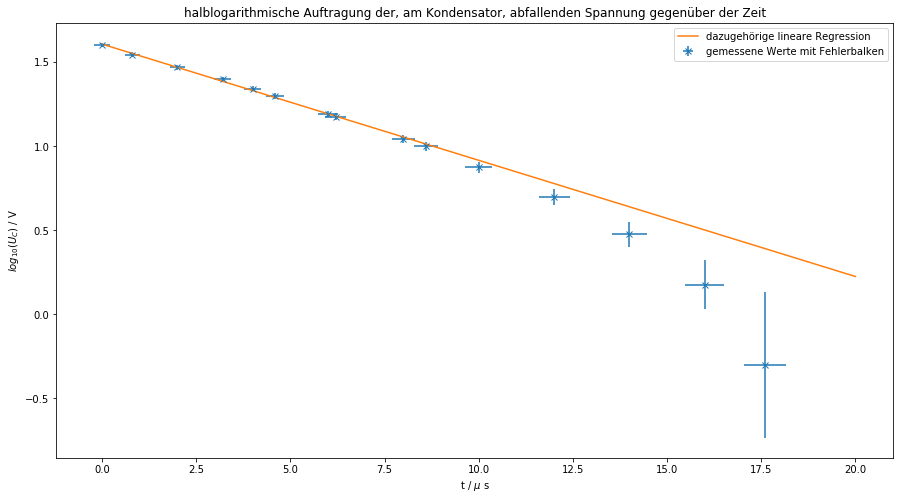

In [191]:

plt.figure(figsize = (15,8))
plt.errorbar(t_c*10**(6), logu_c,dlogu_c,dt_c*10**(6),fmt='x',label='gemessene Werte mit Fehlerbalken')
plt.plot(np.linspace(0,20),linear(np.linspace(0,20)),label = 'dazugehörige lineare Regression')
plt.xlabel(r't / $\mu$ s')
plt.ylabel(r'$log_{10} (U_C)$ / V ')
plt.title('halblogarithmische Auftragung der, am Kondensator, abfallenden Spannung gegenüber der Zeit')
plt.legend()
plt.savefig('56graph1.png')

In [181]:
a2, b2, da2, db2 = ap.GewichteteRegression(t_r*10**6, logu_r,dlogu_r)
def linear2(x):
    return a2 + b2*x

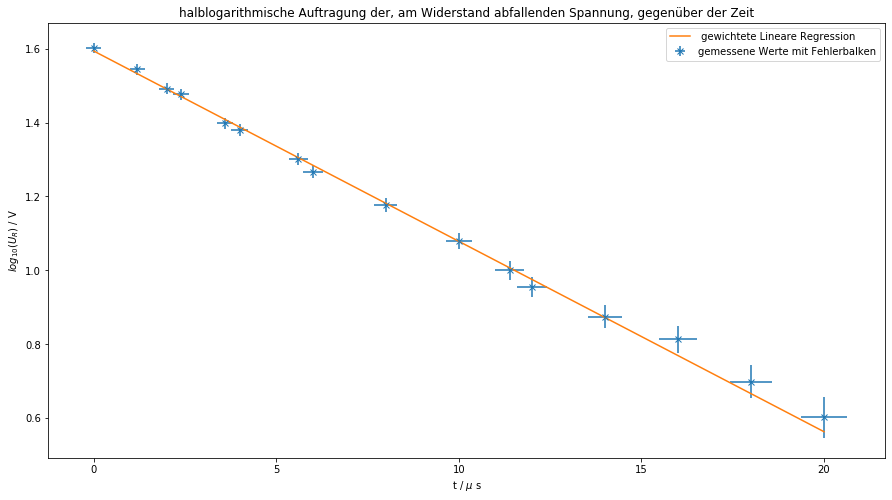

In [182]:
plt.figure(figsize = (15,8))
plt.errorbar(t_r*10**6,logu_r, dlogu_r, dt_r*10**6,'x', label = 'gemessene Werte mit Fehlerbalken')
plt.plot(np.linspace(0,20),linear2(np.linspace(0,20)), label = ' gewichtete Lineare Regression')
plt.xlabel(r't / $\mu$ s')
plt.ylabel(r'$log_{10} (U_R)$ / V ')
plt.title('halblogarithmische Auftragung der, am Widerstand abfallenden Spannung, gegenüber der Zeit')
plt.legend()
plt.savefig('56graph2.png')

In [266]:
tau1 = - np.log10(np.e)/(b1 * 10**6)
tau2 = - np.log10(np.e)/(b2 * 10**6)

dtau1 =  np.log10(np.e) * db1 /(b1)**2 /10**6
dtau2 =  np.log10(np.e) * db2 / (b2)**2 /10**6
print(tau1, dtau1)
print(tau2, dtau2)
print(tau2 *np.log(2),dtau2 *np.log(2))

6.284079888954671e-06 1.9174768989974075e-07
8.427792430607992e-06 1.813198223435466e-07
5.841700561620378e-06 1.256813236370595e-07


In [267]:
C = 680 * 10 ** (-12)
R = 10000

R1 = tau1 / C
R2 = tau2 / C

dR1 = dtau1 / C
dR2 = dtau2 / C

print(R1, dR1)
print(R2, dR2)

9241.293954345105 281.98189691138344
12393.812397952928 266.6467975640391


# Direkte Messung der Halbwertszeit

In [263]:
thalb = np.array([ 6.1, 5.7*0.5, 3.4*0.5, 5.8, 3.7, 3.9*0.5])
Rliste = np.array([10,5.6, 3.3, 10, 5.6, 3.3]) *1000

dthalb = np.sqrt((0.03 *thalb)**2 + 0.1 **2)
dRliste = 0.01 * Rliste

tau = thalb / np.log(2) /10**6
dtau = dthalb/np.log(2) /10**6
r_rechnen = tau/C
dr_rechnen = dtau/C
print(tau1, dtau1)
print(tau2, dtau2)

6.284079888954671e-06 1.9174768989974075e-07
8.427792430607992e-06 1.813198223435466e-07


In [230]:
df = pd.DataFrame(data=[r_rechnen, dr_rechnen, Rliste, dRliste],
                  index=['r rechnung', 'dr rechnung', 'R abgelesen', 'dR abgelesen']).T
df

,r rechnung,dr rechnung,R abgelesen,dR abgelesen
0,12941.8,442.4,10000.0,100.0
1,6046.6,279.1,5600.0,56.0
2,3606.7,238.2,3300.0,33.0
3,12305.3,425.8,10000.0,100.0
4,7850.0,317.0,5600.0,56.0
5,4137.1,245.8,3300.0,33.0


In [231]:

print(df.to_latex(index=False))

\begin{tabular}{rrrr}
\toprule
 r rechnung &  dr rechnung &  R abgelesen &  dR abgelesen \\
\midrule
    12941.8 &        442.4 &      10000.0 &         100.0 \\
     6046.6 &        279.1 &       5600.0 &          56.0 \\
     3606.7 &        238.2 &       3300.0 &          33.0 \\
    12305.3 &        425.8 &      10000.0 &         100.0 \\
     7850.0 &        317.0 &       5600.0 &          56.0 \\
     4137.1 &        245.8 &       3300.0 &          33.0 \\
\bottomrule
\end{tabular}



In [257]:
def tabelle(listlist):
    string = ''
    for i in range(len(listlist[0])):
        for j in range(len(listlist[i])):
            if j ==0:
                string += str(round(listlist[i][j],2))
            else:
                string += ' &   ' +str(round(listlist[i][j],2))
        string += '   \\\\'
    return  (string)
print(tabelle([r_rechnen, dr_rechnen]))

12941.82 &   6046.59 &   3606.74 &   12305.34 &   7849.96 &   4137.14   \\442.44 &   279.14 &   238.16 &   425.78 &   316.97 &   245.8   \\
